# [FastCampus] 파이썬을 활용한 이커머스 데이터 분석하기

## Ch04. 고객 이탈 예측(KNN)

### 01. 분석의 목적

- KNN 알고리즘으로 고객이탈(customer churn)을 예측
- Binary Classification(고객 이탈을 한다 안한다를 예측하기 때문이다.)
- 통신사 고객데이터를 이용하여 유추해 보려한다. 통신사 고객 데이터는 고객 이탈이 빈번하기 때문에 이번 주제에 알맞는 데이터이다.

### 02. KNN의 원리

KNN의 뜻은 K-Nearly-Neighbors의 약자로 새로운 데이터의 특성을 가장 가까운 데이터의 특성을 이용하여 예측하는 방식이다.

### 03. 파이썬 Tip - list

아래 코드와 같이 대괄호를 이용하여 리스트를 만든다. 

In [6]:
x = [1,2,3] 

In [7]:
['a','b','c']

['a', 'b', 'c']

리스트 안에 리스트도 만들 수 있다.

In [8]:
y = [1,2,3,[4,5]]

위 코드는 리스트가 4개 들어가 있는 형식이라 볼 수 있다.

데이터의 길이를 확인하려면 len() 메서드를 사용하면 된다.

In [9]:
len(x)

3

In [10]:
len(y)

4

In [11]:
my_list = [1,2,3,4,5]

In [12]:
my_list

[1, 2, 3, 4, 5]

appen() 메서드를 이용하면 리스트에 새로운 데이터를 추가로 넣어 줄 수 있다.

In [13]:
my_list.append(6)

In [14]:
my_list

[1, 2, 3, 4, 5, 6]

6이 추가된 것을 볼 수 있다. 문자도 넣어줄 수 있다.

In [15]:
my_list.append('a')

In [16]:
my_list

[1, 2, 3, 4, 5, 6, 'a']

다음과 같이 인덱싱도 가능하다.

In [17]:
my_list[-2]

6

In [18]:
my_list[3:]

[4, 5, 6, 'a']

리스트 안에 있는 데이터를 바꾸려면 아래와 같이 하면 된다.

In [19]:
my_list[0] = 'x'

In [20]:
my_list

['x', 2, 3, 4, 5, 6, 'a']

튜플 타입은 리스트와는 다르게 안에 있는 데이터를 바꿀 수 없다.

### 04. 파이썬 Tip - For, While 문

In [22]:
x = [1,2,3]

In [23]:
x

[1, 2, 3]

x 안에 있는 데이터 1,2,3을 차례대로 출력할 수 있는 코드를 For문을 이용해 만들어 보자.

In [24]:
for i in x:
    print(i)

1
2
3


In [25]:
for i in x:
    print(i+10)

11
12
13


range() 메서드를 이용하면 0부터 9까지의 일련의 숫자들이 자동으로 정렬된다. 이 메서드를 이용하면 조금 더 편리하다.

In [26]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


이번엔 for문을 이용해 인덱싱을 해보자.

In [30]:
a = ['apple','orange','banana','melon']

In [31]:
b = [1,0,2]

In [33]:
for i in b:
    print(a[i])

orange
apple
banana


while문은 for문과 비슷하지만 for문과는 다르게 조건이 만족한다면 계속해서 돌아가는 방식이다.

In [35]:
t = 11

In [36]:
while t < 10:
    print('hi')

위 처럼 while문 안의 조건이 맞지 않으면 아무것도 실행되지 않는다. 조건이 맞는다면 무한루프로 계속 hi가 나오게 될 것이다. 그래서 조건이 잘 끝날 수 있도록 정해주어야 한다.

In [37]:
t = 0

In [38]:
while t < 10:
    print(t)
    t = t + 1

0
1
2
3
4
5
6
7
8
9


이번엔 while문을 사용하여 리스트를 만들어 보자.

In [39]:
a = []

In [40]:
b = 1

In [41]:
while len(a) < 10:
    a.append(b)
    b = b + 3

In [42]:
a

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28]

In [43]:
len(a)

10

### 05. 모듈, 데이터 로딩 및 데이터 확인

먼저 필요한 모듈을 불러오자.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv('churn.csv')

In [49]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [50]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


컬럼이 너무 많아서 ... 으로 나오는 부분까지 모두 보려면 아래의 set_option() 메서드를 이용하여 출력하면 된다. 행을 모두 보려면 columns 대신 rows를 입력해주면 된다.

In [53]:
pd.set_option('display.max_columns', 30)

In [54]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


컬럼을 확인해 보자.

- cutomerID : 고객 ID (분석에는 크게 의미없는 데이터이다.)
- gender : 성별
- SeniorCitizen : SeniorCitizen이 아닌지 여부
- Partner : Parter 여부
- Dependents : Dependents 여부
- tenure : 얼마나 사용했는지의 대한 달의 수
- Phone Survice 
- MultipleLines : 회선의 갯수
- InternetService
- OnlineSecurity 
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV	
- StreamingMovies	
- Contract : 월 단위 계약인지 연 단위 계약인지의 대한 내용
- PaperlessBilling
- PaymentMethod : 결제 수단
- MonthlyCharges : 월별 금액	
- TotalCharges : 총 지불한 금액
- Churn : 고객이 이탈을 했는지 안했는지의 여부 (이번 분석에서 예측할 컬럼이다.)

각 컬럼들의 정보를 알아보자.

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


숫자로 되어있는 데이터보단 텍스트로 되어 있는 데이터가 더 많은 것을 볼 수 있다. TotalCharges는 위의 데이터 상에선 숫자로 되어있는데 info()로 확인해 보니 텍스트 형식으로 되어 있는것을 볼 수 있다. 이것을 숫자 데이터로 바꾸어줄 필요가 있어 보인다.

In [56]:
pd.to_numeric(data['TotalCharges'])

ValueError: Unable to parse string " " at position 488

488번째 데이터에 숫자가 아닌 " " 이런 데이터가 포함되어 있어 숫자 데이터로 바꿀 수 없다고 오류가 난다. 488 번째의 데이터를 확인해보자.

In [57]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

스페이스바로 되어 있는 이 부분을 바꾸어 주려면 replace() 메서드를 이용하여 바꾸어 줄 수 있다. 

In [61]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", "")

위이 코드와 같이 스페이스바 부분의 공백을 없애주면 숫자 데이터로 변환할 수 있다.

In [63]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


float64로 바뀐것을 확인할 수 있다.

In [65]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


/home/jaeyoon89/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

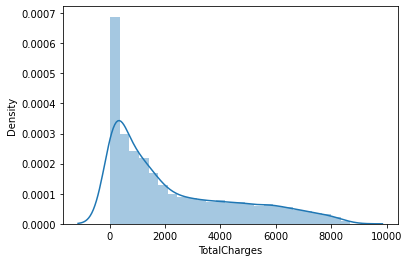

In [68]:
sns.distplot(data['TotalCharges'])

### 06. 카테고리 변수 처리

위 데이터의 Gender 컬럼에서 Female과 male을 분석을 위해 0과 1로 바꾸어줄 필요가 있다. male과 female을 숫자로 바꾸어 주려면 2개의 다른 컬럼을 만들어 주어야 한다. 그리고 그 안에 0 또는 1로 채워 넣어주면 된다.